In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bcancer=pd.read_csv("BreastCancer.csv",index_col=0)
X=bcancer.drop('Class',axis=1)
y=bcancer['Class']

In [3]:
tsne=TSNE(random_state=23,perplexity=40).set_output(transform='pandas')  #perplexity is a tuning parameter
X_tsne=tsne.fit_transform(X)

/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<function matplotlib.pyplot.show(close=None, block=None)>

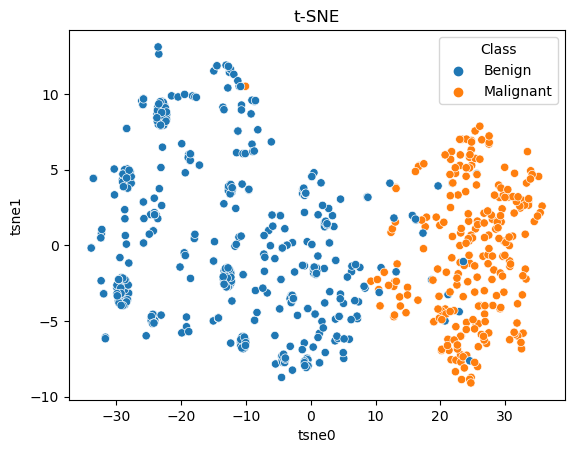

In [4]:
tsne_pd=pd.concat([X_tsne,y],axis=1)

sns.scatterplot(data=tsne_pd,x='tsne0',y='tsne1',hue='Class')
plt.title('t-SNE')
plt.show

# Separation with TSNE is better than separation with PCA

In [5]:
#tsne dont have dot transformation function

In [7]:
scores=[]
perplex=[5,15,30,35]
for i in perplex:
    tsne=TSNE(random_state=23,perplexity=i)
    X_tsne=tsne.fit_transform(X)
    svm=SVC(kernel='linear')
    params={}
    gcv=GridSearchCV(svm,param_grid=params,cv=kfold,verbose=3)
    gcv.fit(X_tsne,y)
    scores.append(gcv.best_score_)
    
print("Best score =", np.max(scores))
print("Best perplexity =", perplex[np.argmax(scores)])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.864 total time=   0.4s
[CV 2/5] END ..................................., score=0.900 total time=   0.3s
[CV 3/5] END ..................................., score=0.893 total time=   0.3s
[CV 4/5] END ..................................., score=0.914 total time=   0.6s
[CV 5/5] END ..................................., score=0.835 total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.929 total time=   0.0s
[CV 2/5] END ..................................., score=0.979 total time=   0.0s
[CV 3/5] END ..................................., score=0.979 total time=   0.0s
[CV 4/5] END ..................................., score=0.964 total time=   0.0s
[CV 5/5] END ..................................., score=0.921 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END 

# avoid GRIDSEARCH

In [9]:
from sklearn.model_selection import cross_val_score
scores=[]
perplex=[5,15,30,35]
for i in perplex:
    tsne=TSNE(random_state=23,perplexity=i)
    X_tsne=tsne.fit_transform(X)
    svm=SVC(kernel='linear')
    results=cross_val_score(svm,X_tsne,y,cv=kfold,verbose=3)
    scores.append(results.mean())
    
print("Best score =", np.max(scores))
print("Best perplexity =", perplex[np.argmax(scores)])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.864) total time=   0.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END ................................ score: (test=0.900) total time=   0.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] END ................................ score: (test=0.893) total time=   0.3s
[CV] END ................................ score: (test=0.914) total time=   0.5s
[CV] END ................................ score: (test=0.835) total time=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


[CV] END ................................ score: (test=0.929) total time=   0.0s
[CV] END ................................ score: (test=0.979) total time=   0.0s
[CV] END ................................ score: (test=0.979) total time=   0.0s
[CV] END ................................ score: (test=0.964) total time=   0.0s
[CV] END ................................ score: (test=0.921) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


[CV] END ................................ score: (test=0.936) total time=   0.0s
[CV] END ................................ score: (test=0.971) total time=   0.0s
[CV] END ................................ score: (test=0.993) total time=   0.0s
[CV] END ................................ score: (test=0.950) total time=   0.0s
[CV] END ................................ score: (test=0.928) total time=   0.0s
[CV] END ................................ score: (test=0.929) total time=   0.0s
[CV] END ................................ score: (test=0.979) total time=   0.0s
[CV] END ................................ score: (test=0.986) total time=   0.0s
[CV] END ................................ score: (test=0.979) total time=   0.0s
[CV] END ................................ score: (test=0.957) total time=   0.0s
Best score = 0.9656526207605344
Best perplexity = 35


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
